In [1]:
%matplotlib inline
import json
from collections import defaultdict
import cv2
import matplotlib.pyplot as plt

from cepdof_api import draw_cxcywhd

In [2]:
# Set the paths of the images directory and the annotation file
imgs_dir = './CEPDOF_sample/video_0/'
annotation_path = './CEPDOF_sample/annotations/video_0.json'
# Load the annotation file
ann_data = json.load(open(annotation_path, 'r'))

In [3]:
# Print the information of the first image
img_info = ann_data['images'][0]
print(img_info)

{'file_name': 'Lunch3_000001.jpg', 'id': 'Lunch3_000001', 'width': 2048, 'height': 2048}


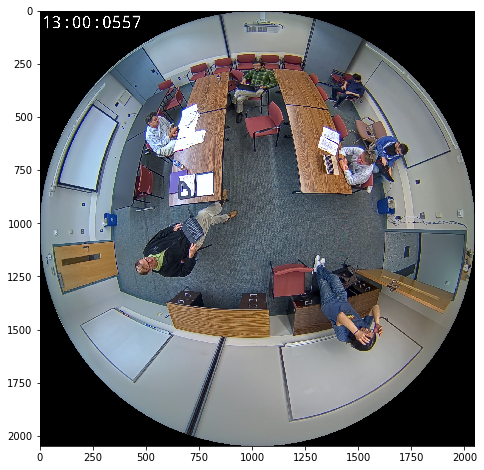

In [4]:
# Read the first image
im = plt.imread(imgs_dir + img_info['file_name'])
# Plot it
plt.figure(figsize = (8,8))
plt.imshow(im)
plt.show()

In [5]:
# Build the mapping from image_id to annotations
imgId_to_anns = defaultdict(list)
_ = [imgId_to_anns[ann['image_id']].append(ann) for ann in ann_data['annotations']]

In [6]:
# Get the annotations for the first image
anns = imgId_to_anns[img_info['id']]
# Print the first annotation
# The annotation format is the same as COCO except the following differences:
#     1. Each 'bbox' is a list of 5 floats, representing for [center_x, center_y, width, height, degrees rotated clockwise].
#     2. We do not have 'segmentation'.
#     3. Each annotation has one more entry ==============================================================
#     4. We have only one category 'person'. All objects are 'person'.
print(anns[0])

{'area': 131282.24863635, 'bbox': [1442.4975, 1364.545, 256.9861, 510.8535, -22.918329405326745], 'category_id': 1, 'image_id': 'Lunch3_000001', 'iscrowd': 0, 'segmentation': [], 'person_id': 4}


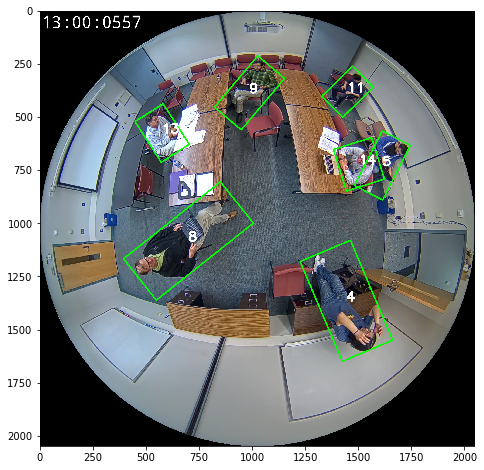

In [7]:
# Visualize the annotations
for ann in anns:
    # Draw the bbox on the image in-place
    cx, cy, w, h, degree = ann['bbox']
    draw_cxcywhd(im, cx, cy, w, h, degree, color=(0,255,0))
    # Put the person id on the image in-place
    if 'person_id' in ann:
        pid = str(ann['person_id'])
        cv2.putText(im, pid, (int(cx),int(cy)), cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255),
                    8, cv2.LINE_AA)
# Plot the new image
plt.figure(figsize = (8,8))
plt.imshow(im)
plt.show()